# Project: Data Analysis of Covid - 19 Tweets


## Introduction

### **Questions to help understand the data:**
- What are the common source of tweets?
- What are the common user locations?
- What are the most popular hashtags?
- Which day and month had the highest number of Tweets?
- What are the tweeting trends?

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
import neattext.functions as nfx

warnings.filterwarnings('ignore')

#### Load Dataset

In [3]:
df = pd.read_csv('covid19_tweets.csv')
df.sample(10)

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
125686,Poorvi Nema,"Indore, India",MJMC Student,2018-02-12 11:33:21,88,48,1114,False,2020-08-14 07:04:47,Just a reminder india crosses 24 lakh coronavi...,NaN,Twitter for Android,False
9024,Coronavirus Updates,NaN,COVID-19 (Coronavirus) Latest News & Statistic...,2020-03-07 12:52:51,433,1,0,False,2020-07-25 06:31:23,13 new cases in Georgia \n\n[7:31 GMT] #corona...,"['coronavirus', 'CoronaVirusUpdate', 'COVID19'...",COVID19-Updates,False
142369,𝐁𝐞𝐧𝐨𝐧 𝐅𝐫𝐞𝐝 𝐓𝐖𝐈𝐍𝐀𝐌𝐀𝐒𝐈𝐊𝐎™,"Kampala, UGANDA","Founder MD & CEO, Lead Consultant @hopeconsult...",2009-04-29 10:27:05,1628,2946,27137,False,2020-08-17 07:06:32,"Dear #Ugandans, kindly know that the 66 New #C...","['Ugandans', 'COVID19']",Twitter for Android,False
90276,Sania Nishtar,Pakistan,Special Assistant of the Prime Minister of Pak...,2012-03-01 05:10:38,362239,55,696,True,2020-08-09 09:19:19,Survey data will 1) assist with rule-based tar...,"['Ehsaas', 'COVID19']",Twitter Web App,False
108839,Belfast Telegraph,"Belfast, Northern Ireland","Northern Ireland news, sport, features, opinio...",2009-02-12 15:57:34,185756,15194,171,True,2020-08-11 07:33:47,"Coronavirus updates: Around 730,000 UK jobs lo...","['coronavirus', 'COVID19']",TweetDeck,False
225,Hindustan Petroleum Corporation Limited,India,Official Twitter handle of Hindustan Petroleum...,2010-02-07 03:59:52,152595,1483,37932,True,2020-07-25 12:20:19,We Shall Over Come! With victory in our minds ...,['FightAgainstCorona'],Twitter Web App,False
52248,SearchSecurity.com,"MA: 40.758348,-73.986972","The latest cybersecurity news, tips and featur...",2008-12-10 13:39:49,27352,1063,6447,False,2020-08-01 19:10:02,"As employees trickle back into to the office, ...",NaN,Sprout Social,False
119442,PIB in Maharashtra 🇮🇳,"Mumbai, India",Zonal Office of Press Information Bureau @PIB_...,2011-06-02 08:39:48,36947,630,2589,True,2020-08-13 09:51:45,#Coronawatch India\n\nMore than 2.68 Crore sam...,"['Coronawatch', 'COVID19']",Twitter Web App,False
77587,"PapaPear (aka, Yo Semite Sam)",FL,"A conservative says, ""It hasn't happened to me...",2012-05-10 18:59:49,437,479,22555,False,2020-08-06 15:51:19,Aug 6 #Florida #Covid19 update\n\nSignificantl...,"['Florida', 'Covid19']",Twitter Web App,False
134425,Rachit Desai,"ÜT: 18.547958,73.900569",Entrepreneur. Technophile. Management Consulta...,2010-02-13 02:11:20,260,211,578,False,2020-08-16 07:53:10,What South Korea can teach the world about con...,"['SouthKorea', 'covid19']",IFTTT,False


## Data Overview

#### **Visual Data Assessment**
- Prescence of Null Values.
- Prescence of hashtags in the text column.
- Prescence of urls in the text column.
- Prescence of spaces in the text column.
- Prescence of symbols in the text column.
- Prescence of spaces in the text column.

#### **Programmatic Data Assessment**


In [5]:
df.shape

(179108, 13)

In [4]:
df.columns

Index(['user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'text', 'hashtags', 'source', 'is_retweet'],
      dtype='object')

In [6]:
# Data types
df.dtypes

user_name           object
user_location       object
user_description    object
user_created        object
user_followers       int64
user_friends         int64
user_favourites      int64
user_verified         bool
date                object
text                object
hashtags            object
source              object
is_retweet            bool
dtype: object

**Observations**

- The data has 179108 records and 13 features. 
- The user_created and date features data type is incorrect
- Some locations are expressed as longitudes and latitudes.

## Data Wrangling

In [7]:
data = df.copy()

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179108 entries, 0 to 179107
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   user_name         179108 non-null  object
 1   user_location     142337 non-null  object
 2   user_description  168822 non-null  object
 3   user_created      179108 non-null  object
 4   user_followers    179108 non-null  int64 
 5   user_friends      179108 non-null  int64 
 6   user_favourites   179108 non-null  int64 
 7   user_verified     179108 non-null  bool  
 8   date              179108 non-null  object
 9   text              179108 non-null  object
 10  hashtags          127774 non-null  object
 11  source            179031 non-null  object
 12  is_retweet        179108 non-null  bool  
dtypes: bool(2), int64(3), object(8)
memory usage: 15.4+ MB


Convert data types

In [10]:
data['user_created'] = pd.to_datetime(data['user_created'], errors='coerce')
data['date'] = pd.to_datetime(data['date'], errors='coerce')

In [12]:
data.infer_objects().dtypes

user_name                   object
user_location               object
user_description            object
user_created        datetime64[ns]
user_followers               int64
user_friends                 int64
user_favourites              int64
user_verified                 bool
date                datetime64[ns]
text                        object
hashtags                    object
source                      object
is_retweet                    bool
dtype: object

In [13]:
data.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False


## Exploratory Data Analysis

#### Source of tweets.

In [15]:
data['source'].unique()

array(['Twitter for iPhone', 'Twitter for Android', 'Twitter Web App',
       'Buffer', 'TweetDeck', 'Twitter for iPad', 'Africa Newsroom',
       'Blood Donors India', 'TweetCaster for Android',
       'Alexander Higgins', 'IFTTT', 'Hootsuite Inc.', 'Sprout Social',
       'Sprinklr', 'assarofficial', 'IAMBLOG2TWITTER', 'CrowdControlHQ',
       'COVID19-Updates', 'EveryoneSocial', 'Dynamic Signal', 'Instagram',
       'TweetCaster for iOS', 'GlobalPandemic.NET', 'Venrap Radio',
       'HeyOrca', 'Twitter for Advertisers', 'Paper.li',
       'Twitter Media Studio', 'Twitter for Mac', 'dlvr.it',
       'Cheap Bots, Done Quick!', 'Prof. Shanku', 'LaterMedia',
       'SEMrush Social Media Tool', 'Twitterrific for iOS',
       "Sebastian's Twitter Bot", 'Threader_client', 'COVID19FactoidBot',
       'PwC UK SMART', 'tweet pro stiff', 'UK COVID-19 Alerts',
       'Resistbot Open Letters', 'preprint-alert', 'ContentStudio.io',
       'Peeping Moon', 'TweetAutomaticos', 'Orlo', 'AgoraPulse Ma

In [17]:
print('There are {} uniques sources'.format(data['source'].nunique()))

There are 610 uniques sources


In [18]:
data['source'].value_counts()

Twitter Web App              56891
Twitter for Android          40179
Twitter for iPhone           35472
TweetDeck                     8543
Hootsuite Inc.                7321
                             ...  
DataBlogger                      1
Dear_Assistant                   1
OnlyPultCom                      1
Washington Square Parkerz        1
Radiology: AI app                1
Name: source, Length: 610, dtype: int64

Top 20 sources of tweets.

In [19]:
data['source'].value_counts().nlargest(20)

Twitter Web App         56891
Twitter for Android     40179
Twitter for iPhone      35472
TweetDeck                8543
Hootsuite Inc.           7321
Twitter for iPad         4336
Buffer                   2728
Sprout Social            1833
Instagram                1759
IFTTT                    1545
dlvr.it                   681
GlobalPandemic.NET        679
LinkedIn                  628
COVID19-Updates           625
Twitter Media Studio      596
WordPress.com             537
HubSpot                   513
Sprinklr                  497
FS Poster                 414
Dynamic Signal            391
Name: source, dtype: int64

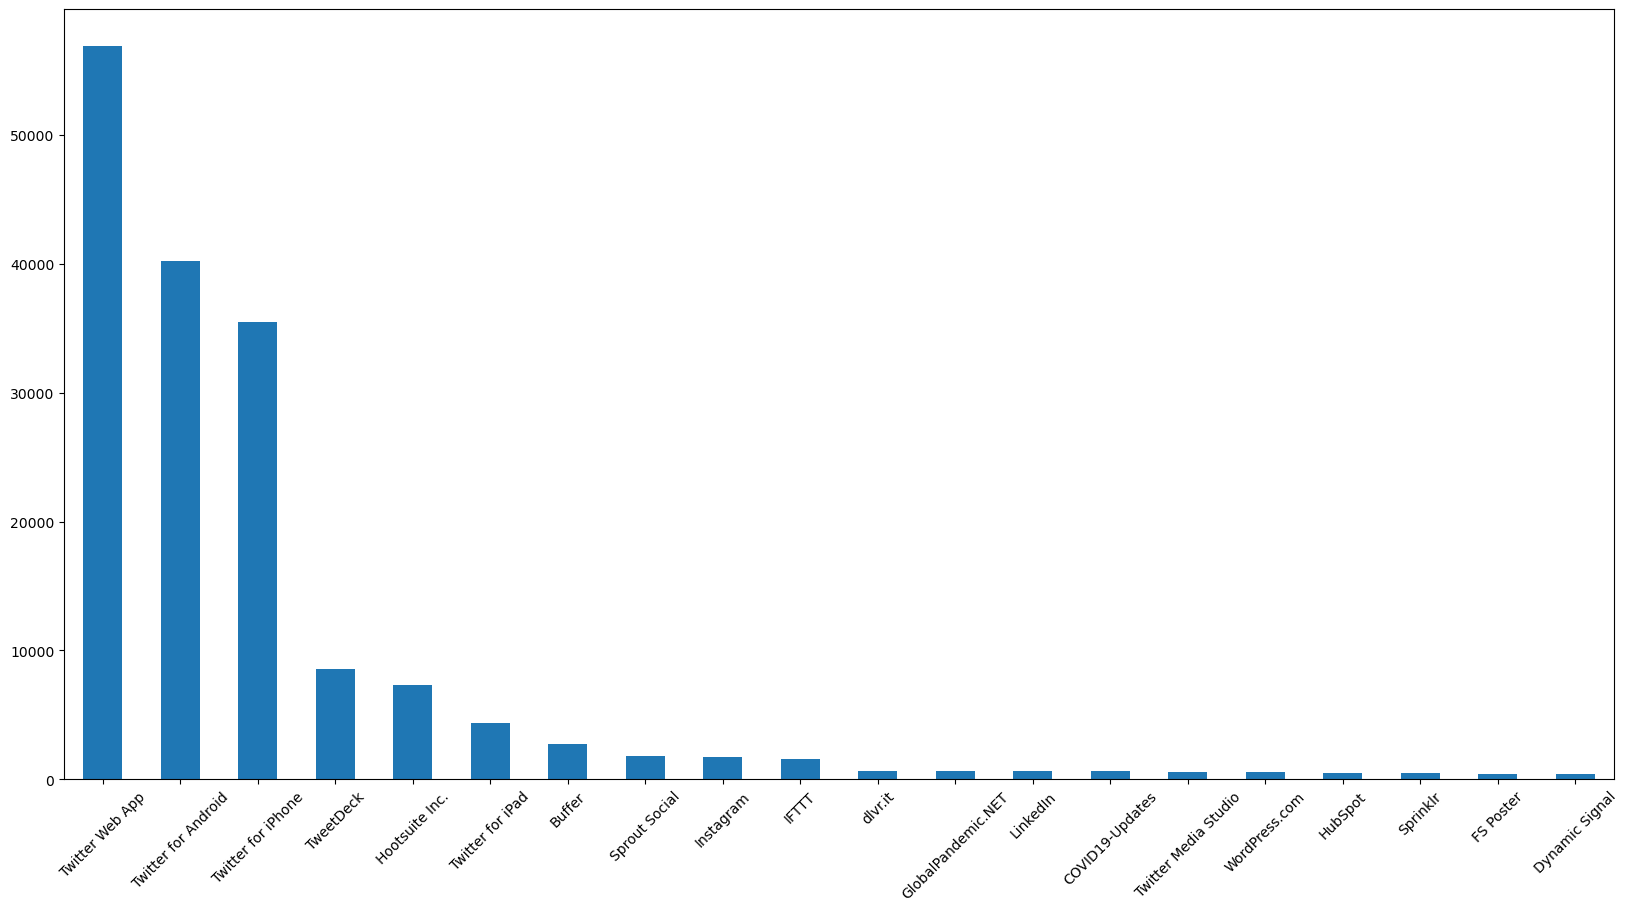

In [20]:
plt.figure(figsize = (20,10))
data['source'].value_counts().nlargest(20).plot(kind='bar')
plt.xticks(rotation = 45)
plt.show()

Majority of the tweets were made from twitter web app, followed by twitter for android and others.

#### Tweet Locations.

In [22]:
data['user_location'].value_counts()

India                         3741
United States                 2455
New Delhi, India              1721
Mumbai, India                 1401
Washington, DC                1354
                              ... 
Crystal Lake, IL                 1
Johnstown, PA                    1
A little east of LAX...          1
#Ireland                         1
Aliwal North, South Africa       1
Name: user_location, Length: 26920, dtype: int64

Top 20 locations of users.

In [23]:
data['user_location'].value_counts().nlargest(20)

India               3741
United States       2455
New Delhi, India    1721
Mumbai, India       1401
Washington, DC      1354
London, England     1269
United Kingdom      1206
London              1103
New York, NY        1082
Australia            964
Worldwide            879
Canada               835
New Delhi            822
USA                  817
UK                   803
WORLDWIDE            777
Los Angeles, CA      776
South Africa         766
Lagos, Nigeria       731
California, USA      709
Name: user_location, dtype: int64

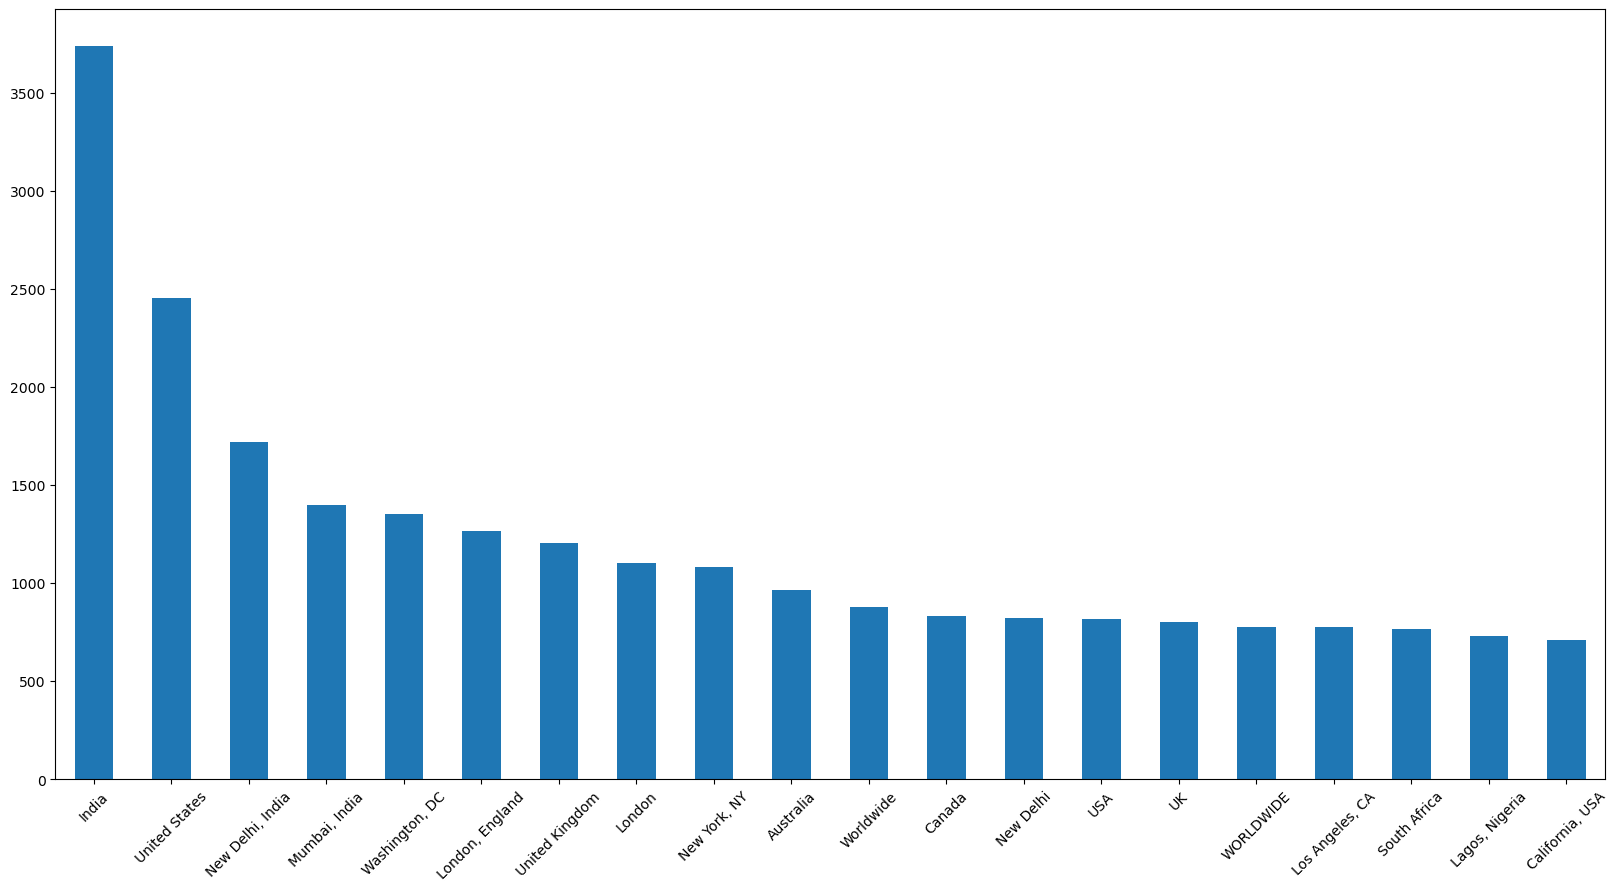

In [24]:
plt.figure(figsize = (20,10))
data['user_location'].value_counts().nlargest(20).plot(kind='bar')
plt.xticks(rotation = 45)
plt.show()

## Text Analysis of tweets.

Clean Text by: 
- Remove user handles
- Remove hashtags
- Remove emojis
- Remove urls

In [25]:
print(dir(nfx))

['BTC_ADDRESS_REGEX', 'CURRENCY_REGEX', 'CURRENCY_SYMB_REGEX', 'Counter', 'DATE_REGEX', 'EMAIL_REGEX', 'EMOJI_REGEX', 'HASTAG_REGEX', 'MASTERCard_REGEX', 'MD5_SHA_REGEX', 'MOST_COMMON_PUNCT_REGEX', 'NUMBERS_REGEX', 'PHONE_REGEX', 'PoBOX_REGEX', 'SPECIAL_CHARACTERS_REGEX', 'STOPWORDS', 'STOPWORDS_de', 'STOPWORDS_en', 'STOPWORDS_es', 'STOPWORDS_fr', 'STOPWORDS_ru', 'STOPWORDS_yo', 'STREET_ADDRESS_REGEX', 'TextFrame', 'URL_PATTERN', 'USER_HANDLES_REGEX', 'VISACard_REGEX', '__builtins__', '__cached__', '__doc__', '__file__', '__generate_text', '__loader__', '__name__', '__numbers_dict', '__package__', '__spec__', '_lex_richness_herdan', '_lex_richness_maas_ttr', 'clean_text', 'defaultdict', 'digit2words', 'extract_btc_address', 'extract_currencies', 'extract_currency_symbols', 'extract_dates', 'extract_emails', 'extract_emojis', 'extract_hashtags', 'extract_html_tags', 'extract_mastercard_addr', 'extract_md5sha', 'extract_numbers', 'extract_pattern', 'extract_phone_numbers', 'extract_posto

In [26]:
data.text.iloc[2]

'@diane3443 @wdunlap @realDonaldTrump Trump never once claimed #COVID19 was a hoax. We all claim that this effort to… https://t.co/Jkk8vHWHb3'

In [16]:
data['extracted_hashtags'] = data['text'].apply(nfx.extract_hashtags)

In [17]:
data[['extracted_hashtags','hashtags']]

,extracted_hashtags,hashtags
0,[],NaN
1,[],NaN
2,[#COVID19],['COVID19']
3,[#COVID19],['COVID19']
4,"[#CoronaVirusUpdates, #COVID19]","['CoronaVirusUpdates', 'COVID19']"
...,...,...
179103,[#WearAMask],['WearAMask']
179104,[#COVID19],['COVID19']
179105,[],NaN
179106,[#COVID19],['COVID19']


In [18]:
# Find percentage that matches

In [19]:
data['clean_tweet'] = data['text'].apply(nfx.remove_hashtags)

In [20]:
data[['clean_tweet','text']]

,clean_tweet,text
0,If I smelled the scent of hand sanitizers toda...,If I smelled the scent of hand sanitizers toda...
1,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,Hey @Yankees @YankeesPR and @MLB - wouldn't it...
2,@diane3443 @wdunlap @realDonaldTrump Trump nev...,@diane3443 @wdunlap @realDonaldTrump Trump nev...
3,@brookbanktv The one gift has give me is an ...,@brookbanktv The one gift #COVID19 has give me...
4,25 July : Media Bulletin on Novel \n@kansa...,25 July : Media Bulletin on Novel #CoronaVirus...
...,...,...
179103,Thanks @IamOhmai for nominating me for the @WH...,Thanks @IamOhmai for nominating me for the @WH...
179104,2020! The year of insanity! Lol! https://t.c...,2020! The year of insanity! Lol! #COVID19 http...
179105,@CTVNews A powerful painting by Juan Lucena. I...,@CTVNews A powerful painting by Juan Lucena. I...
179106,"More than 1,200 students test positive for a...","More than 1,200 students test positive for #CO..."


In [21]:
data['clean_tweet'] = data['clean_tweet'].apply(lambda x: nfx.remove_userhandles(x))

In [22]:
data[['clean_tweet','text']]

,clean_tweet,text
0,If I smelled the scent of hand sanitizers toda...,If I smelled the scent of hand sanitizers toda...
1,Hey and - wouldn't it have made more sen...,Hey @Yankees @YankeesPR and @MLB - wouldn't it...
2,Trump never once claimed was a hoax. W...,@diane3443 @wdunlap @realDonaldTrump Trump nev...
3,The one gift has give me is an appreciatio...,@brookbanktv The one gift #COVID19 has give me...
4,25 July : Media Bulletin on Novel \n ...,25 July : Media Bulletin on Novel #CoronaVirus...
...,...,...
179103,Thanks for nominating me for the challen...,Thanks @IamOhmai for nominating me for the @WH...
179104,2020! The year of insanity! Lol! https://t.c...,2020! The year of insanity! Lol! #COVID19 http...
179105,A powerful painting by Juan Lucena. It's a t...,@CTVNews A powerful painting by Juan Lucena. I...
179106,"More than 1,200 students test positive for a...","More than 1,200 students test positive for #CO..."


In [23]:
data.clean_tweet.iloc[10]

'49K+ Covid19 cases still no response from \n      cancel the compartment exa… https://t.co/kV2ZKmumu1'

In [24]:
data['clean_tweet'] = data['clean_tweet'].apply(lambda x: nfx.remove_multiple_spaces(x))

In [25]:
data[['clean_tweet','text']]

,clean_tweet,text
0,If I smelled the scent of hand sanitizers toda...,If I smelled the scent of hand sanitizers toda...
1,Hey and - wouldn't it have made more sense to ...,Hey @Yankees @YankeesPR and @MLB - wouldn't it...
2,Trump never once claimed was a hoax. We all c...,@diane3443 @wdunlap @realDonaldTrump Trump nev...
3,The one gift has give me is an appreciation f...,@brookbanktv The one gift #COVID19 has give me...
4,25 July : Media Bulletin on Novel https://t.co...,25 July : Media Bulletin on Novel #CoronaVirus...
...,...,...
179103,Thanks for nominating me for the challenge. I ...,Thanks @IamOhmai for nominating me for the @WH...
179104,2020! The year of insanity! Lol! https://t.co/...,2020! The year of insanity! Lol! #COVID19 http...
179105,A powerful painting by Juan Lucena. It's a tr...,@CTVNews A powerful painting by Juan Lucena. I...
179106,"More than 1,200 students test positive for at ...","More than 1,200 students test positive for #CO..."


In [26]:
data['clean_tweet'] = data['clean_tweet'].apply(nfx.remove_urls)

In [28]:
# Take out special characters

In [27]:
data['clean_tweet'] = data['clean_tweet'].apply(nfx.remove_puncts)

### Sentiment Analysis